In [31]:
def SSWM(n,FF,M, beta, N,L=0,a=0):
    x=Init(n)
    #print x
    W=Fitness(x,FF)
    Timer=0
    MutCount=0
    MyTimer=[]
    MyMutCount=[]
    MaxFit=Fitness(numpy.array([1]*n),FF)
    while W<MaxFit-a:
        #print W
        xn=Mutation(x,M)
        Wn=Fitness(xn,FF)
        Timer+=1
        DeltaF=Wn-W
        Pfix=(1-numpy.exp(-2*beta*DeltaF))/(1-numpy.exp(-2*N*beta*DeltaF))
        if Pfix>random.random():
            x=list(xn)
            W=Wn
            MutCount+=1
            #print x
            #print W
            #print Timer
            MyTimer.append(Timer)
            MyMutCount.append(MutCount)
    MyTimer= numpy.array(MyTimer)
    MyMutCount= numpy.array(MyMutCount)
    #print W
    return MyMutCount, MyTimer, Timer

    
def Mutation(x,M):
    xn=list(x)
    if M==1:
        a=random.randint(1,len(x))-1
        xn[a]=(xn[a]-1)%2
    if M==2: 
        print 'global mutations - not yet implemented'
    return xn

 
def Fitness(x,FF,L=0):
    if FF==1:
        W=sum(x)
        #print 'OneMax'
    if FF==2:
        W=0
        i=0
        if sum(x)==len(x):
            W=len(x)
            return W
        while (x[i]==1) & (W<len(x)):
                W+=1
                i+=1
    if FF==3:
        W=0
        i=0
        if sum(x)<L:
            W=sum(x)
        else:
            W=sum(x)-L+0.5
    return W
    
def Init(n):
    x=sum(numpy.random.randint(1, size=(1,n)))  #for init = all zeros
    #x=sum(numpy.random.randint(2, size=(1,n)))  #for random init, cca 50:50
    return x

   
def Runtime(n,m,FF, M, L=0,  beta =0.1, N=1000,a=0):
    T=[]
    Mut=0
    for i in range(m):
        (Mc,Tc, t)=SSWM(n,FF,M, beta, N,L,a)
        Mut=Mut+Mc
        T.append(t)
    #MyT=float(T)/m
    MyT=numpy.mean(T)
    MyTStd=numpy.std(T)
    return MyT, MyTStd

def Main():

    m=20 #repetitions
    t=100
    beta =0.1
    N=1000  #popuation size
    MyRT=[]
    MyRTSTD=[]
    Myn=[]
    FF=1  #which fitness landscape we are using: 1-onemax, 2 leading ones
    M=1    #which type of mutation we are using 1-local, 2 - global
    L=3
    a=5   #acceptable distance from the optimum
    for n in range (10,1000,40):
        print ('running for n=', n)
        (RT, RTSTD)=Runtime(n, m, FF, M, L, beta, N,a)
        MyRT.append(RT)
        MyRTSTD.append(RTSTD)
        Myn.append(n)
     
    MyRT= numpy.array(MyRT)
    MyRTSTD= numpy.array(MyRTSTD)
    Myn= numpy.array(Myn)
    

    
    #ouf = open("test_subor.txt", "w")
    #ouf.write("MyRT\n")
    #ouf.write(str( MyRT))
    #ouf.write('\n')
    #ouf.write('MyRTSTD\n')
    #ouf.write(str( MyRTSTD))
    #ouf.write('\n')
    #ouf.write('Myn\n')
    #ouf.write(str( Myn))
    #ouf.write('\n')
    #ouf.close()

    plt.plot(Myn,MyRT,'b')
    plt.plot(Myn,MyRT+MyRTSTD, 'g')
    plt.plot(Myn,MyRT-MyRTSTD, 'g')
    
    plt.show()
    
    
    print 'ended'

('running for n=', 10)
('running for n=', 50)
('running for n=', 90)
('running for n=', 130)
('running for n=', 170)
('running for n=', 210)
('running for n=', 250)
('running for n=', 290)
('running for n=', 330)
('running for n=', 370)
('running for n=', 410)
('running for n=', 450)
('running for n=', 490)
('running for n=', 530)
('running for n=', 570)
('running for n=', 610)
('running for n=', 650)
('running for n=', 690)
('running for n=', 730)
('running for n=', 770)
('running for n=', 810)
('running for n=', 850)
('running for n=', 890)
('running for n=', 930)
('running for n=', 970)


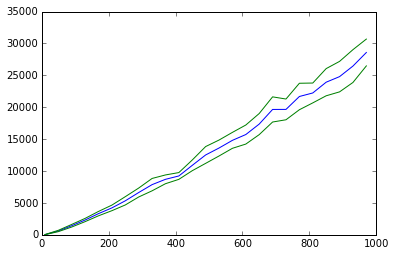

ended


In [32]:
import random   
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Main()